In [337]:
#from lib2to3.pytree import convert
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tinymlgen import port
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil
import cv2
import matplotlib.pyplot as plt
import math

In [338]:
x = np.load('C:\\Users\\poori\\x_gray.npy')
y = np.load('C:\\Users\\poori\\y_gray.npy')
print(np.shape(x))
print(np.shape(y))
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
decoded_y = label_encoder.inverse_transform(encoded_y)
result_y_Dict = dict(zip(encoded_y, decoded_y))

(3169, 144, 176)
(3169,)


In [339]:
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.2, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=4)
print("size of x_train is ", np.shape(x_train))
print("size of x_test is ", np.shape(x_test))


size of x_train is  (1901, 144, 176)
size of x_test is  (634, 144, 176)


Now, size of x_train is  (1901, 144, 176, 1)
Now, size of x_test is  (634, 144, 176, 1)
Now, size of x_train is  (634, 144, 176, 1)


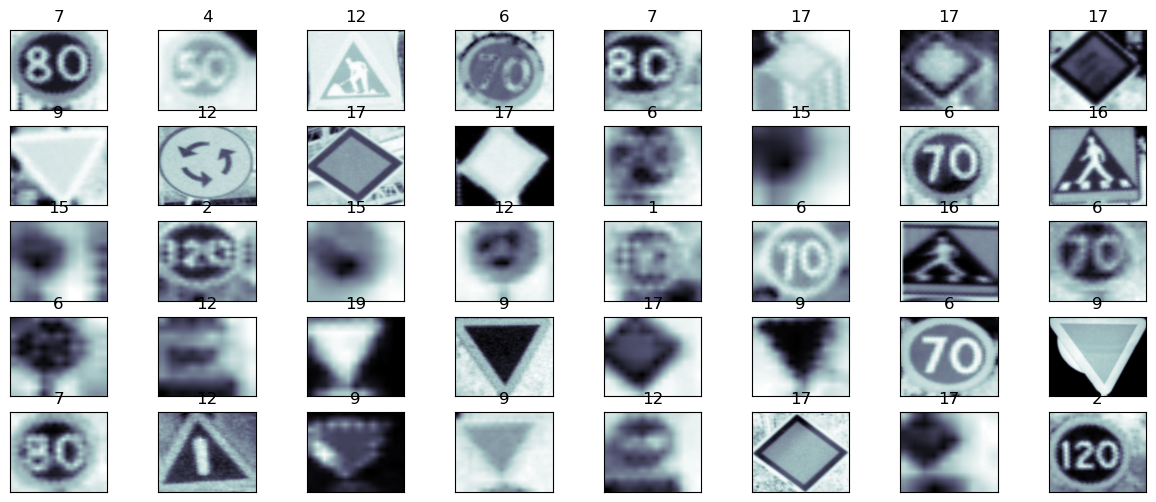

In [340]:
fig = plt.figure(figsize=(15,6)) #figure size is in inches.

for i in range(40):
 ax = fig.add_subplot(5,8, i+1, xticks=[], yticks=[])
 ax.imshow(x_train[i], cmap='bone_r')
 ax.set_title(y_train[i])
x_train = x_train.reshape((-1, x_train.shape[1], x_train.shape[2], 1))
print("Now, size of x_train is ", np.shape(x_train))

x_test = x_test.reshape((-1, x_test.shape[1], x_test.shape[2], 1))
print("Now, size of x_test is ", np.shape(x_test))

x_val = x_val.reshape((-1, x_val.shape[1], x_val.shape[2], 1))
print("Now, size of x_train is ", np.shape(x_val))

In [341]:
model = Sequential([
    Conv2D(2, (3,3), activation='relu', input_shape=x_train.shape[1:]),
    MaxPool2D((2, 2)),
    Conv2D(2, (4,4), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(2, (2,2), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(300, activation='relu', name = 'dense_1'),
    Dense(20, activation='softmax', name = 'dense_2') # probability
])

# text Description of model
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 142, 174, 2)       20        
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 71, 87, 2)         0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 68, 84, 2)         66        
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 34, 42, 2)         0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 33, 41, 2)         18        
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 16, 20, 2)       

In [342]:
# define loss function and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(x_train, y_train, epochs=20, batch_size=50, verbose=2, validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Epoch 1/20
31/31 - 10s - loss: 3.2434 - accuracy: 0.2941 - val_loss: 2.4428 - val_accuracy: 0.3753 - 10s/epoch - 325ms/step
Epoch 2/20
31/31 - 9s - loss: 1.9976 - accuracy: 0.5184 - val_loss: 2.0118 - val_accuracy: 0.4724 - 9s/epoch - 274ms/step
Epoch 3/20
31/31 - 8s - loss: 1.5507 - accuracy: 0.5987 - val_loss: 1.8345 - val_accuracy: 0.5039 - 8s/epoch - 260ms/step
Epoch 4/20
31/31 - 9s - loss: 1.3065 - accuracy: 0.6454 - val_loss: 1.7146 - val_accuracy: 0.5669 - 9s/epoch - 276ms/step
Epoch 5/20
31/31 - 8s - loss: 1.0974 - accuracy: 0.7046 - val_loss: 1.5486 - val_accuracy: 0.6247 - 8s/epoch - 260ms/step
Epoch 6/20
31/31 - 8s - loss: 0.9716 - accuracy: 0.7401 - val_loss: 1.5508 - val_accuracy: 0.6168 - 8s/epoch - 267ms/step
Epoch 7/20
31/31 - 8s - loss: 0.8912 - accuracy: 0.7520 - val_loss: 1.3887 - val_accuracy: 0.6509 - 8s/epoch - 259ms/step
Epoch 8/20
31/31 - 8s - loss: 0.7316 - accuracy: 0.7914 - val_loss: 1.4127 - val_accuracy: 0.6745 - 8s/epoch - 265ms/step
Epoch 9/20
31/31 - 8s 

0
Predicted label: 100_SIGN


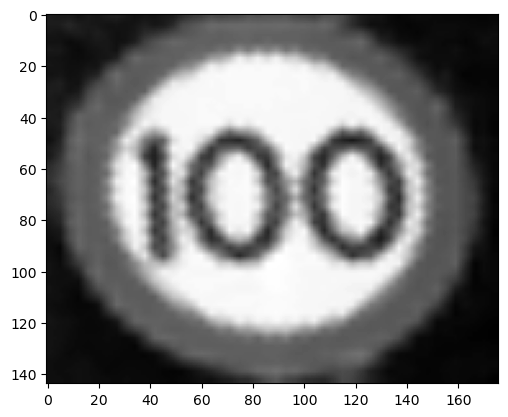

In [350]:
# input an image from x_val to test if the model works fine
image_index = 72
plt.imshow(np.squeeze(x_val[image_index]), cmap='gray')
# make a prediction
yhat = model.predict([np.expand_dims(x_val[image_index], axis=0)], verbose = 0)
result = np.argmax(yhat)
print(result)
value = result_y_Dict.get(result)
print('Predicted label: {}'.format(value))

In [351]:
c_code = port(model, variable_name='road_sign_detection', pretty_print=True,optimize=False)
filename = 'road.h'
with open(filename,'w') as f: 
    f.write(c_code)

INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpw51jl_6w\assets


INFO:tensorflow:Assets written to: C:\Users\poori\AppData\Local\Temp\tmpw51jl_6w\assets
